<h1>💵 CAR SALES 🚗</h1>

<h2>🪟 Background (Latar Belakang)</h2>

Sebagai platform jual-beli mobil bekas, kami ingin:

- Meningkatkan kualitas rekomendasi harga

- Menemukan pola harga berdasarkan kondisi dan spesifikasi kendaraan

- Menyediakan prediksi harga jual yang adil & kompetitif

<h2>📝 Objective (Pertanyaan Bisnis yang Harus Dijawab)</h2>

1. Apa saja faktor utama yang memengaruhi harga mobil bekas?
Apakah tahun pembuatan, merek, kondisi, dan odometer paling berpengaruh?
Bagaimana efek jenis transmisi atau jenis bodi?

2. Apakah ada perbedaan preferensi atau harga di tiap negara bagian (state)?
Misalnya: mobil SUV mungkin lebih laku di Texas dibandingkan di California?

3. Bagaimana hubungan antara kondisi mobil dan odometer dengan harga pasar?
Apakah mobil dengan kondisi “excellent” tetap bisa turun harga kalau odometernya tinggi?

4. Apakah ada brand atau model tertentu yang mempertahankan nilai jual lebih baik dari lainnya?
Ini penting untuk strategi investasi atau rekomendasi ke pembeli.

5. Apakah mungkin kita memprediksi kisaran harga jual yang adil untuk mobil tertentu berdasarkan data historis?
Buat prototype model prediksi harga (regresi)

<h2>🔎 Details</h2>

- year
The manufacturing year of the vehicle.

- make
The brand or manufacturer of the vehicle.

- model
The specific model of the vehicle.

- trim
dditional designation for the vehicle model.

- body
The body type of the vehicle (e.g., SUV, Sedan).

- transmission
The type of transmission in the vehicle (e.g., automatic).

- vin
Vehicle Identification Number, a unique code for each vehicle.

- state
The state where the vehicle is registered.

- condition
Condition of the vehicle, possibly rated on a scale.

- odometer
The mileage or distance traveled by the vehicle.

- seller
The entity selling the vehicle.

- mmr
Manheim Market Report, possibly indicating the estimated market value of the vehicle.

- sellingprice
The price at which the vehicle was sold.

- saledate
The date and time when the vehicle was sold.

Import Dependencies

In [167]:
import pandas as pd
import numpy as np
# from datetime import datetime as dt
from dateutil import parser

import matplotlib.pyplot as plt
import seaborn as sns

import os

pd.set_option("display.max_columns", None)

In [168]:
df = pd.read_csv("dataset/car_prices.csv")
df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


EDA

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [170]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [171]:
df.duplicated().sum()

0

Cleaning Data / Preprocessing Data

In [172]:
# delete null value
df.dropna(inplace=True)


In [173]:
# mengecek duplikasi pada kolom vin 'vehicle identification number'
df.duplicated(subset='vin').sum()

6557

In [174]:
# mengahpus duplikasi value pada kolom vin dengan menyimpan nilai pertamanya
df = df.drop_duplicates(subset='vin', keep='first')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465768 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          465768 non-null  int64  
 1   make          465768 non-null  object 
 2   model         465768 non-null  object 
 3   trim          465768 non-null  object 
 4   body          465768 non-null  object 
 5   transmission  465768 non-null  object 
 6   vin           465768 non-null  object 
 7   state         465768 non-null  object 
 8   condition     465768 non-null  float64
 9   odometer      465768 non-null  float64
 10  color         465768 non-null  object 
 11  interior      465768 non-null  object 
 12  seller        465768 non-null  object 
 13  mmr           465768 non-null  float64
 14  sellingprice  465768 non-null  float64
 15  saledate      465768 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 60.4+ MB


In [176]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [177]:
# change saledate to the correct foramat
df['saledate'] = df['saledate'].apply(lambda x:parser.parse(x).strftime('%Y%m%d'))

df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,20141216
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,20141216
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,20150115
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,20150129
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,20141218


In [178]:
df['saledate'] = pd.to_datetime(df['saledate'], format='%Y%m%d')
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18


In [179]:
# memperbaiki penulisan persentase value

df['condition'] = np.where(df['condition']<10, df['condition']*10, df['condition'])

df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,50.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,50.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18


Penghapusan Variavel Tidak Relevan

In [180]:
# df = df.drop(columns='vin')

<h3>Objective 1</h3>

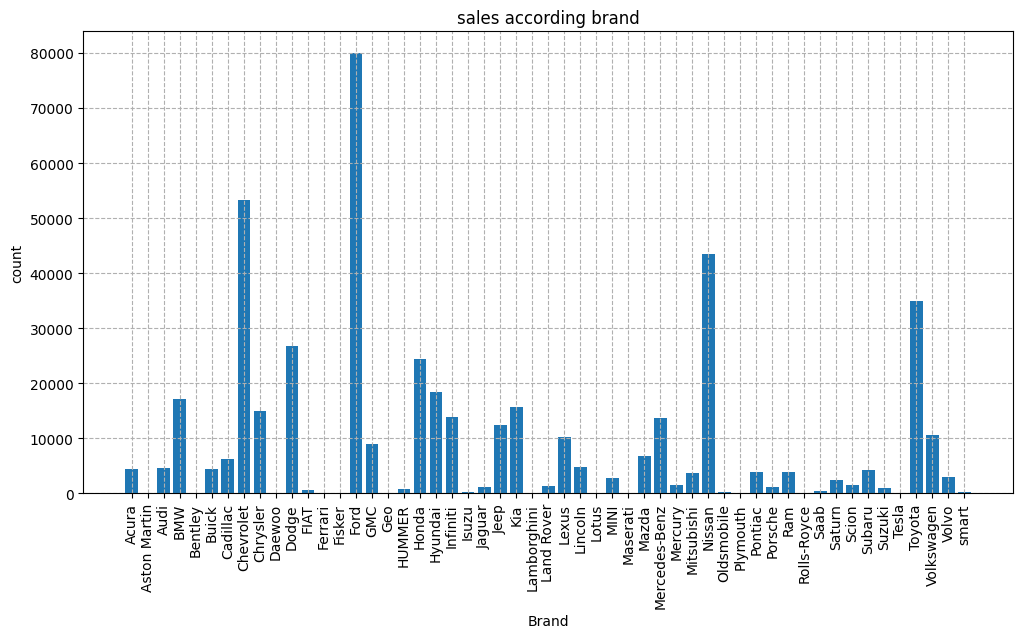

In [184]:
# banyaknya pembelian mobil berdasarkan brand
bar_obj_11 = df.groupby('make')['vin'].count().reset_index()

plt.figure(figsize=(12,6))
plt.bar(bar_obj_11['make'],bar_obj_11['vin'])
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.ylabel("count")
plt.grid(linestyle='--')
plt.title("sales according brand")
plt.show()

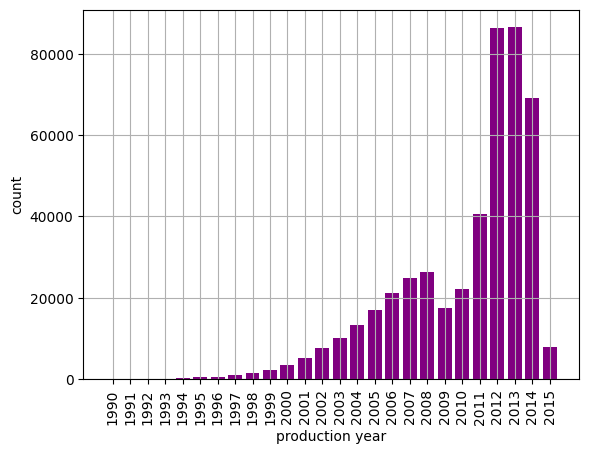

In [191]:
# banyaknya pembelian berdasarkan tahun keluaran mobil
bar_obj_12 = df.groupby('year')['saledate'].count().reset_index()

plt.Figure(figsize=(12,6))
plt.bar(bar_obj_12['year'], bar_obj_12['saledate'], color='purple')

plt.xlabel("production year")
year = sorted(bar_obj_12['year'].unique())
plt.xticks(ticks=year, rotation=90)

plt.ylabel("count")
plt.grid()
plt.show()

In [ ]:
# pembelian mobil berdasarkan kondisi mobil
